# Práctica 8 - Clasificador por K vecinos más cercanos 2024-25

El clasificador por vecinos más cercanos, **KNearestNeighbor**, pertenece a un grupo de métodos denominados perezosos (*lazy leaners*) ya que son métodos que en la fase de aprendizaje se limitan a almacenar las muestras de entrenamiento sin ningún proceso de generalización. La clasificación se realiza buscando la muestra del conjunto de entrenamiento más cercana a la de muestra a clasificar, y asignándole a esta última la clase a la que pertenece la más cercana . 

En su versión más simple, la clasificación de una muestra implica el cálculo de la distancia a todas las muestras de entrenamiento, para luego encontrar la más próxima. Esta sería la clasificación por el vecino más cercano. Sin embargo para evitar el efecto del ruido en las muestras, se puede utilizar en lugar de la muestra más cercana, las **k** muestras más cercanas y decidir la clase por mayoría. Es decir, que a la muestra a clasificar se le asigna la clase que es mayoritaria entre las *k* muestras más cercanas del conjunto de entrenamiento.

## Clasficación por el vecino más cercano

In [8]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean # for distance calculation "euclidean"
import matplotlib.pyplot as plt
import numpy as np

Puedes utilizar euclidean distance con scipy una libreria o hacerlo a mano. En este caso, lo haremos a mano. 

```python
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
```

Generar conjunto de train con 10 muestras, y el de test con 2 muestras sin clase.

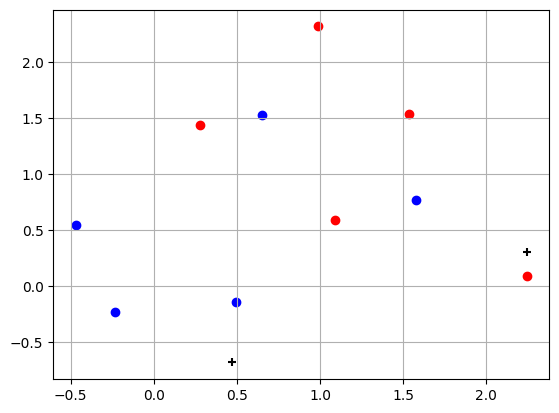

In [9]:
X_train, y_train = make_blobs(n_samples=10, n_features=2, centers=[(0,0), (2,2)], random_state=42) # training points
X_test, _ = make_blobs(n_samples=2, n_features=2, centers=[(0,0), (2,2)], random_state=12) # test points

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue') # training points
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red') # training points

plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='+') # test points
plt.grid()


Calcular distancias a las muestras con indicación de la clase a la que pertenece cada muestra existente.

In [10]:
from time import sleep


X_tmp = X_test[0]
print('Muestra desconocida:', X_tmp)
for i in range(X_train.shape[0]): # por cada muestra de entrenamiento
    distancia = euclidean(X_tmp, X_train[i]) # calcular la distancia euclidiana
    print(f'Distancia a {X_train[i]} (clase {y_train[i]}): {distancia}')
    sleep(1)

print('---')
X_tmp = X_test[1]
print('Muestra desconocida:', X_tmp)
for i in range(X_train.shape[0]):
    distancia = euclidean(X_tmp, X_train[i])
    print(f'Distancia a {X_train[i]} (clase {y_train[i]}): {distancia}')
    sleep(1)

Muestra desconocida: [2.2424395  0.29926437]
Distancia a [0.64768854 1.52302986] (clase 0): 2.010182229433554
Distancia a [0.98716888 2.31424733] (clase 1): 2.373996772910537
Distancia a [0.27508217 1.43771247] (clase 1): 2.273006587779162
Distancia a [1.53658231 1.53427025] (clase 1): 1.4224886279909987
Distancia a [-0.46947439  0.54256004] (clase 0): 2.72280548213184
Distancia a [1.09197592 0.5876963 ] (clase 1): 1.1860688895628664
Distancia a [ 0.49671415 -0.1382643 ] (clase 0): 1.7997189530943634
Distancia a [1.57921282 0.76743473] (clase 0): 0.8118208666964342
Distancia a [2.24196227 0.08671976] (clase 1): 0.21254514637412916
Distancia a [-0.23415337 -0.23413696] (clase 0): 2.5333829600004742
---
Muestra desconocida: [ 0.47298583 -0.68142588]
Distancia a [0.64768854 1.52302986] (clase 0): 2.21136747896136
Distancia a [0.98716888 2.31424733] (clase 1): 3.0394805806804492
Distancia a [0.27508217 1.43771247] (clase 1): 2.1283592759465497
Distancia a [1.53658231 1.53427025] (clase 1):

Un version más optimizada y generalizada sería:

In [11]:
distancias = np.zeros(X_train.shape[0]) # vector para almacenar distancias

for idx_test in range(X_test.shape[0]):

    X_tmp = X_test[idx_test]            
    print(f'Muestra desconocida {idx_test}: {X_tmp}')

    for idx_train in range(X_train.shape[0]):
        distancias[idx_train] = euclidean(X_tmp, X_train[idx_train])

    pos_min = np.argmin(distancias)
    print(f'Clase: {y_train[pos_min]}')

Muestra desconocida 0: [2.2424395  0.29926437]
Clase: 1
Muestra desconocida 1: [ 0.47298583 -0.68142588]
Clase: 0


El algoritmo de clasificación por el vecino más cercano es el siguiente:

1. Para cada muestra de test:
    1. Calcular la distancia a todas las muestras de train.
    2. Encontrar la muestra más cercana.
    3. Asignar la clase de la muestra más cercana a la muestra de test.

En pseudocódigo:
```python
Entrada:
    - dataset_entrenamiento: lista de puntos con sus etiquetas (x, y)
    - punto_consulta: punto nuevo a clasificar
    - k: número de vecinos más cercanos
    - distancia: función de distancia (por ejemplo, Euclidiana)

Proceso:
    1. Para cada punto (x_entrenado, y_entrenado) en dataset_entrenamiento:
           calcular distancia entre punto_consulta y x_entrenado
           guardar (distancia, y_entrenado) en una lista

    2. Ordenar la lista por distancia ascendente

    3. Tomar las k primeras etiquetas de la lista ordenada

    4. Realizar una votación entre las k etiquetas:
           contar cuántas veces aparece cada clase
           seleccionar la clase con más votos

Salida:
    - clase_predicha: la clase con más votos entre los k vecinos más cercanos

```

## Clasificación vecinos más cercanos

Clase KNeighborsClassifier definida en el módulo neighbors de la librería sklearn. Entre los parámetros de la clase cabe destacar n_neighbors que define el número de vecinos a utilizar para la clasificación. Entre los métodos que implementa la clase además de los ya utilizados fit y predict, se implementa el método kneighbors que devuelve la distancia y el índice de los k vecinos más próximos del conjunto de entrenamiento a una muestra dada.


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from time import time
import pandas as pd

Leer muestas de train y test

In [13]:
df_train = pd.read_csv('datos/datos8-train.csv')
df_test = pd.read_csv('datos/datos8-test.csv')

X_train = df_train.values[:,:-1]
y_train = df_train.values[:,-1]

X_test = df_test.values[:,:-1]
y_test = df_test.values[:,-1]

print('Train set:')
print(df_train)

print('Test set:')
print(df_test)

FileNotFoundError: [Errno 2] No such file or directory: 'datos/datos8-train.csv'

Dibujar muestras

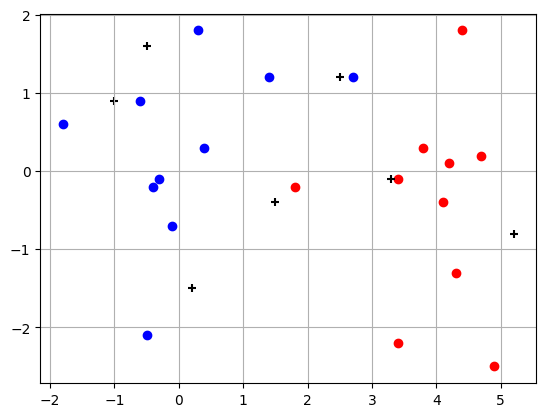

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='black', marker='+')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='black', marker='+')

plt.grid()
plt.show()

Ver que muestras son las que se clasifican mal para comprobar cómo afecta el número de vecinos al resultado. Ir cambiando de 1 a 10. Analizar el número de vecinos para explicar el cambio de clasificación a medida que van cambiando.

In [ ]:
K = 1
knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('y_pred:', y_pred)
print('y_test:', y_test)

y_pred: [1. 0. 0. 1. 1. 0. 0.]
y_test: [0. 0. 0. 1. 1. 0. 1.]


Con K=1 Las muestras que se clasifican incorrectamente son la primera y la última

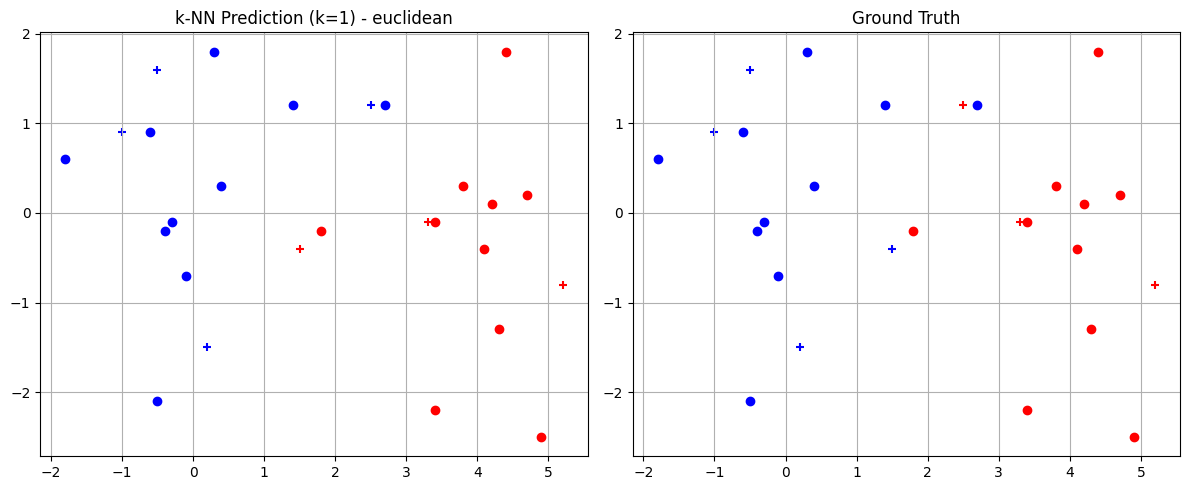

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Subplot 1: KNN Prediction ---
axes[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b')
axes[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')

axes[0].scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1], c='b', marker='+')
axes[0].scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1], c='r', marker='+')

axes[0].set_title(f"k-NN Prediction (k={K}) - euclidean")
axes[0].grid()

# --- Subplot 2: Ground Truth ---
axes[1].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b')
axes[1].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')

axes[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', marker='+')
axes[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='r', marker='+')

axes[1].set_title("Ground Truth")
axes[1].grid()

plt.tight_layout()
plt.show()


## Resultados con datos reales

Utilizar el conjunto de datos "precio_casas_clasificacion.csv" que se corresponde con el utilizado en la práctica de regresión pero en lugar de estimar el precio de la casa, en este caso las casas pertenecen a cinco categorías diferentes según el precio: 'muy alto', 'alto', 'promedio', 'bajo', 'muy bajo'

**Ejercicio de clase**

Estimar la exactitud del precio de las casas usando el conjunto de datos "precio_casas_clasificación.csv" utilizando KNN y estudiar para distintos valores de k. 

In [ ]:
df = pd.read_csv('datos/precio_casas_clasificacion.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
df.describe()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9876)

In [ ]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud para k={k}: {exactitud*100:.1f}')  

Exactitud para k=1: 34.9
Exactitud para k=2: 35.3
Exactitud para k=3: 34.6
Exactitud para k=4: 36.3
Exactitud para k=5: 37.0
Exactitud para k=6: 37.1
Exactitud para k=7: 37.2
Exactitud para k=8: 37.7
Exactitud para k=9: 38.0
Exactitud para k=10: 38.1


los rangos para las diferentes características varían mucho entre sí y eso es un problema para el KNN y en esos casos es mejor llevar todas las características a un rango igual.

In [ ]:
esc = MinMaxScaler()
esc.fit(X_train)
X_train_esc = esc.transform(X_train)
X_test_esc = esc.transform(X_test)

In [ ]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train_esc, y_train)
    y_pred = knn.predict(X_test_esc)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud para k={k}: {exactitud*100:.1f}')    

Exactitud para k=1: 57.4
Exactitud para k=2: 57.1
Exactitud para k=3: 60.2
Exactitud para k=4: 60.8
Exactitud para k=5: 61.4
Exactitud para k=6: 61.8
Exactitud para k=7: 62.0
Exactitud para k=8: 62.0
Exactitud para k=9: 62.0
Exactitud para k=10: 62.2


## Ponderación por la distancia

Un argumento de la clase es el método de ponderación de los vecinos, así el argumento 'weights' indica si el voto de cada vecino se pondera por la distancia ('distance') o no ('uniform'),

In [ ]:
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    t1 = time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test_esc)
    t2 = time()
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Tiempo total {(t2-t1)*1000:.0f}')
    print(f'Exactitud para k={k}: {exactitud*100:.1f}')

Tiempo total 32
Exactitud para k=1: 17.7
Tiempo total 32
Exactitud para k=2: 17.7
Tiempo total 31
Exactitud para k=3: 17.7
Tiempo total 32
Exactitud para k=4: 23.8


In [ ]:
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    t1 = time()
    knn.fit(X_train_esc, y_train)
    y_pred = knn.predict(X_test)
    t2 = time()
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Tiempo total {(t2-t1)*1000:.0f}')
    print(f'Exactitud para k={k}: {exactitud*100:.1f}')

Tiempo total 143
Exactitud para k=1: 40.1
Tiempo total 174
Exactitud para k=2: 40.2
Tiempo total 195
Exactitud para k=3: 40.1
Tiempo total 227
Exactitud para k=4: 40.1


## Método de búsqueda de los vecinos.

Uno de los argumentos clave de la clase `KNeighborsClassifier` (o `KNeighborsRegressor`) en `scikit-learn` es el parámetro `algorithm`, que especifica el método que se utilizará para buscar los vecinos más cercanos. Los valores posibles son:

- `'ball_tree'`
- `'kd_tree'`
- `'brute'`

### ¿Qué hace cada método?

- **KD Tree**  
  El KD Tree (*K-Dimensional Tree*) es una estructura de árbol binario que organiza los puntos en un espacio de k dimensiones. Es muy eficiente para búsquedas de vecinos más cercanos y consultas por rangos cuando el número de características (dimensiones) es pequeño en relación con el número de muestras.

- **Ball Tree**  
  El Ball Tree organiza los puntos en una jerarquía de hiperesferas anidadas. Es más adecuado para espacios de alta dimensión, donde el rendimiento del KD Tree tiende a degradarse.

- **Brute**  
  Realiza una búsqueda exhaustiva comparando directamente la distancia entre el punto de consulta y todos los puntos de entrenamiento. Es simple pero puede ser computacionalmente costoso para grandes volúmenes de datos.

### Experimento propuesto

Vamos a comprobar cómo afecta el método de búsqueda al **tiempo de ejecución** del algoritmo.

1. Usa el conjunto completo de características para entrenar y predecir con cada método (`ball_tree`, `kd_tree`, `brute`).
2. Luego, reduce el número de características a 10 y repite el experimento.
3. Utiliza la función `time()` del módulo `time` para medir la duración de cada ejecución:
   ```python
   from time import time

   inicio = time()
   # código que quieres medir
   fin = time()
   duracion = fin - inicio
   ```

### ✅ Conclusión esperada

- `kd_tree` debería mostrar mejor rendimiento cuando el número de características es pequeño.
- `ball_tree` podría funcionar mejor en espacios de alta dimensión.
- `brute` servirá como referencia base, pero probablemente será más lento para datasets grandes.

In [ ]:
df = pd.read_csv('datos/CelebA-2K.csv')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9876)

In [ ]:
from time import time
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', n_jobs=1) # n_jobs=n para usar n hilos
    knn.fit(X_train, y_train)
    t1 = time() # tiempo de inicio (segundos)
    y_pred = knn.predict(X_test)
    t2 = time() # tiempo de fin (segundos)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud para k={k}: {exactitud*100:.1f}')
    print(f'Tiempo total {(t2-t1)*1000:.2f} ms') # tiempo total en ms se restando el tiempo de inicio al tiempo de fin 
    print()

Exactitud para k=1: 82.2
Tiempo total 6.39 ms

Exactitud para k=2: 75.5
Tiempo total 5.71 ms

Exactitud para k=3: 79.2
Tiempo total 6.08 ms

Exactitud para k=4: 75.5
Tiempo total 5.44 ms

Exactitud para k=5: 78.8
Tiempo total 3.47 ms



Repetir el código anterior utilizando solo 10 atributos en lugar de los 512 y ver cómo afecta a la tasa de acierto y al tiempo

## Clasificación por menor distancia al centroide

Es un caso particular del vecino más próximo, donde cada clase en lugar de estar definida por todas las muestras que la componen, se considera representada por su centroide

In [ ]:
df = pd.read_csv('datos/CelebA-2K.csv')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9876)

In [ ]:
df.head()

,Image_name,Gender,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,007860.jpg,female,-0.016834,-0.062534,0.101955,0.004554,0.050818,0.047877,0.070482,0.056343,...,0.013890,0.078601,-0.247111,-0.100739,0.224464,-0.102820,-0.009611,0.344431,0.064374,-0.301434
1,030843.jpg,male,-0.149386,0.023499,-0.022406,-0.371659,-0.017986,0.059615,-0.042921,0.307462,...,-0.132371,0.042126,0.183425,-0.054782,0.058116,-0.050658,0.099573,-0.254414,-0.122828,-0.038909
2,132520.jpg,female,-0.191758,0.044767,0.000783,-0.159277,-0.084368,-0.026233,-0.059885,0.061149,...,-0.345836,-0.053696,0.038794,-0.065643,-0.007551,0.072963,0.117631,-0.070761,0.287525,0.110923
3,137752.jpg,female,0.014032,-0.130890,0.116910,-0.072261,-0.049759,0.061924,-0.080427,0.131771,...,-0.140629,-0.224949,0.059399,-0.099826,0.149311,0.121945,-0.188849,0.029124,0.280946,-0.055805
4,130923.jpg,male,-0.065040,0.043058,-0.052331,-0.059201,0.004073,-0.023656,0.037980,-0.200148,...,-0.394548,-0.107647,-0.015594,0.218428,-0.178155,-0.146005,0.088374,-0.093011,0.304159,-0.079711


In [ ]:
esc = MinMaxScaler()
esc.fit(X_train)
X_train_esc = esc.transform(X_train)
X_test_esc = esc.transform(X_test)

**KNN normal**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn.fit(X_train_esc, y_train)
t1 = time()
y_pred = knn.predict(X_test_esc)
t2 = time()
print('Exactitud:', accuracy_score(y_test, y_pred)*100)
print(f'Tiempo total: {(t2-t1)*1000:.2f} ms')

Exactitud: 80.0
Tiempo total: 5.19 ms


**KNN usando centroides**

Un centroide es la media de todas las muestras por clase

In [ ]:
clases = np.unique(y_train)
n_clases = len(clases)
centroides = np.zeros((n_clases, X.shape[1]))
for idx, clase in enumerate(clases):
    X_clase = X_train_esc[y_train==clase]
    centroides[idx] = np.mean(X_clase, axis=0)
print(centroides)

[[0.4705327  0.51879143 0.43215933 ... 0.50112531 0.51032553 0.69255369]
 [0.47915907 0.50687857 0.47048945 ... 0.48026916 0.49615615 0.69763947]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) # Ojo! suele ser mejor usar k=1
knn.fit(centroides, clases)
t1 = time()
y_pred = knn.predict(X_test_esc)
t2 = time()
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}')
print(f'Tiempo total: {(t2-t1)*1000:.2f} ms')

Exactitud: 81.0
Tiempo total: 1.20 ms


## Ejercicios

1. Leer el dataset de precios de casas, normaliza y dividelo en train y test. (80% - 20%)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv("datos/precio_casas_clasificacion.csv")

# Separar variables y etiquetas
X = df.drop(columns='Precio')
y = df['Precio']

# Normalización
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2. Medir el tiempo de entrenamiento y test para los métodos `ball_tree`, `kd_tree` y `brute` del KNN usando el conjunto completo de características con jobs = 1.
    - ¿Hay diferencias significativas en el tiempo de ejecución entre los métodos?

In [ ]:
import time

# Métodos a evaluar
algorithms = ['ball_tree', 'kd_tree', 'brute']
tiempos_resultados = {}

for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=5, n_jobs=1)

    # Medir tiempo de entrenamiento
    t0 = time.time()
    knn.fit(X_train, y_train)
    t_entrenamiento = time.time() - t0

    # Medir tiempo de predicción
    t1 = time.time()
    y_pred = knn.predict(X_test)
    t_test = time.time() - t1

    acc = accuracy_score(y_test, y_pred)
    
    tiempos_resultados[algo] = {
        'tiempo_entrenamiento': t_entrenamiento,
        'tiempo_test': t_test,
        'accuracy': acc
    }

NameError: name 'KNeighborsClassifier' is not defined

3. Repetir el experimento anterior pero usando solo 5 características.

In [ ]:
# Cargar el dataset original
df = pd.read_csv("datos/precio_casas_clasificacion.csv")

# Separar variables y etiquetas
X = df.drop(columns='Precio')
y = df['Precio']

# Normalizar solo las primeras 5 características
scaler = MinMaxScaler()
X_5feat = X.iloc[:, :5]
X_5feat_scaled = scaler.fit_transform(X_5feat)

# Dividir en entrenamiento y test
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5feat_scaled, y, test_size=0.2, random_state=42)

# Algoritmos a comparar
algorithms = ['ball_tree', 'kd_tree', 'brute']
tiempos_resultados_5feat = {}

# Medir tiempos y precisión para cada algoritmo con 5 características
for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=5, n_jobs=1)

    # Tiempo de entrenamiento
    t0 = time.time()
    knn.fit(X_train_5, y_train_5)
    t_entrenamiento = time.time() - t0

    # Tiempo de test
    t1 = time.time()
    y_pred = knn.predict(X_test_5)
    t_test = time.time() - t1

    acc = accuracy_score(y_test_5, y_pred)

    tiempos_resultados_5feat[algo] = {
        'tiempo_entrenamiento': t_entrenamiento,
        'tiempo_test': t_test,
        'accuracy': acc
    }

4. Medir el tiempo de entrenamiento y test para los métodos `ball_tree`, `kd_tree` y `brute` del KNN usando el conjunto completo de características con jobs = -1.
    - ¿Hay diferencias significativas en el tiempo de ejecución entre los métodos?

In [ ]:
# los mismo pero usando jobs=-1

5. Entrenar un percetrón y un clasificador basado en regresión logística y comparar los resultados con el KNN. Compara tus resultados con tus compañeros. A ver quién es el que mejor clasifica.
 Puedes hacer lo siguiente:
 - Cambiar el número de vecinos
 - Cambiar el método de búsqueda
 - Cambiar el método de ponderación
 - Normalizar o no normalizar
 - Cambiar el porcentaje de train y test
 - Usar KNN normal o KNN con centroides
 - etc..

## Referencias
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)